In [2]:
# Question 1
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

tesla_data = yf.download("TSLA")
tesla_data.reset_index(inplace = True)
tesla_data.head()

C:\Users\omarh\AppData\Local\Temp\ipykernel_19360\1754981557.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download("TSLA")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2025-10-17,439.309998,441.459991,423.600006,425.500000,89331600
1,2025-10-20,447.429993,449.799988,440.609985,443.869995,63719000
2,2025-10-21,442.600006,449.299988,442.049988,445.760010,54412200
3,2025-10-22,438.970001,445.540009,429.000000,443.450012,84023500
4,2025-10-23,448.980011,449.399994,413.899994,420.000000,126709800


In [4]:
# Question 2

# Create a Ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Get Tesla's quarterly financials (includes Revenue)
tesla_revenue = tesla.quarterly_financials

# Transpose so dates become rows
tesla_revenue = tesla_revenue.transpose().reset_index()

# Keep only the 'Total Revenue' column
tesla_revenue = tesla_revenue[["index", "Total Revenue"]]
tesla_revenue.columns = ["Date", "Revenue"]

tesla_revenue.tail()

,Date,Revenue
2,2025-03-31,1.933500e+10
3,2024-12-31,2.570700e+10
4,2024-09-30,2.518200e+10
5,2024-06-30,NaN
6,2024-03-31,NaN


In [5]:
# Question 3

game_data = yf.download("GME")
game_data = game_data.reset_index()
game_data.head()

C:\Users\omarh\AppData\Local\Temp\ipykernel_19360\396623556.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  game_data = yf.download("GME")
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,GME,GME,GME,GME,GME
0,2025-10-20,23.370001,23.389999,23.120001,23.120001,4424400
1,2025-10-21,22.799999,23.340000,22.799999,23.080000,6387200
2,2025-10-22,22.490000,23.330000,22.240000,22.690001,11012900
3,2025-10-23,23.629999,23.830000,22.459999,22.530001,10638000
4,2025-10-24,23.299999,23.600000,23.219999,23.450001,5771200


In [6]:
# Question 4

gme = yf.Ticker("GME")

# Financials – annual income statement
income = gme.financials.T  # transpose to get dates as rows

# Extract total revenue
gme_revenue = income[["Total Revenue"]].reset_index()

# Rename columns
gme_revenue.columns = ["Date", "Revenue"]

# Show last 5 rows
gme_revenue.tail()


,Date,Revenue
0,2025-01-31,3.823000e+09
1,2024-01-31,5.272800e+09
2,2023-01-31,5.927200e+09
3,2022-01-31,6.010700e+09
4,2021-01-31,NaN


In [7]:
def make_graph(stock_data, revenue_data, stock):
    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data.Date), stock_data.Close.astype("float"), 
                 label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data.Date), revenue_data.Revenue.astype("float"), 
                 label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

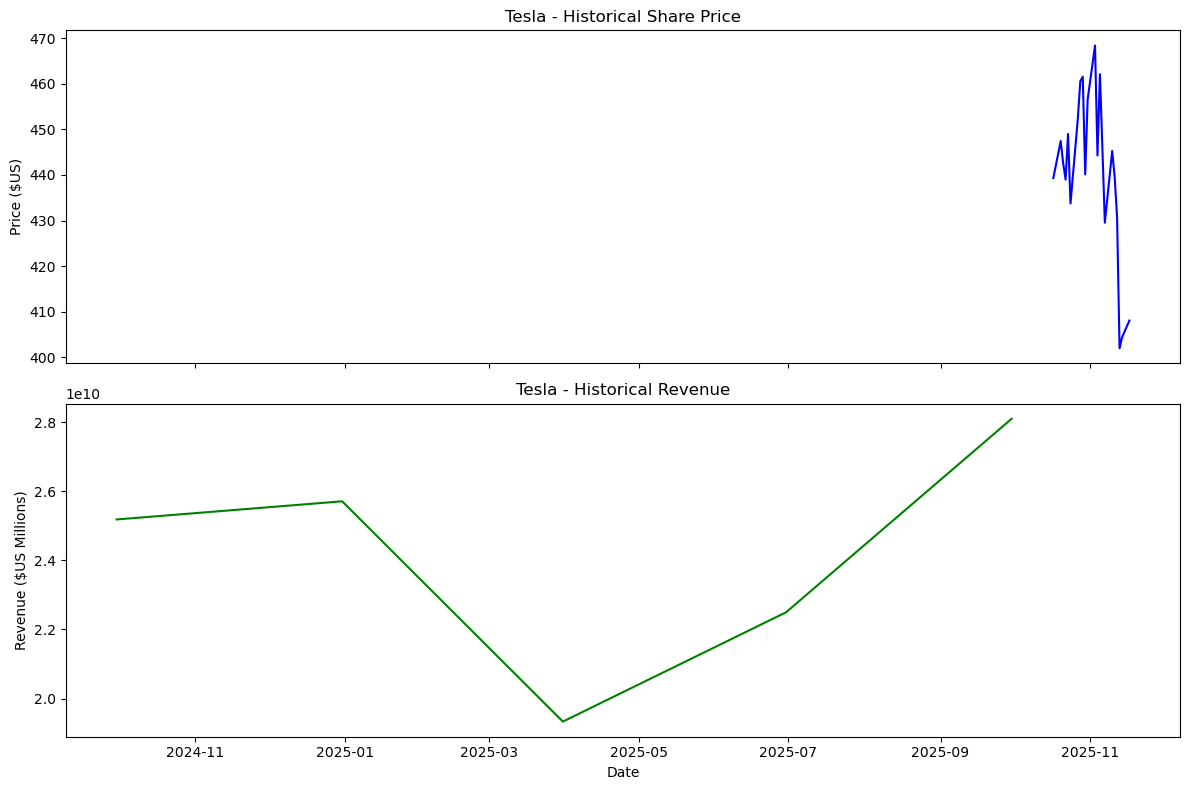

In [8]:
# Question 5

make_graph(tesla_data, tesla_revenue, 'Tesla')

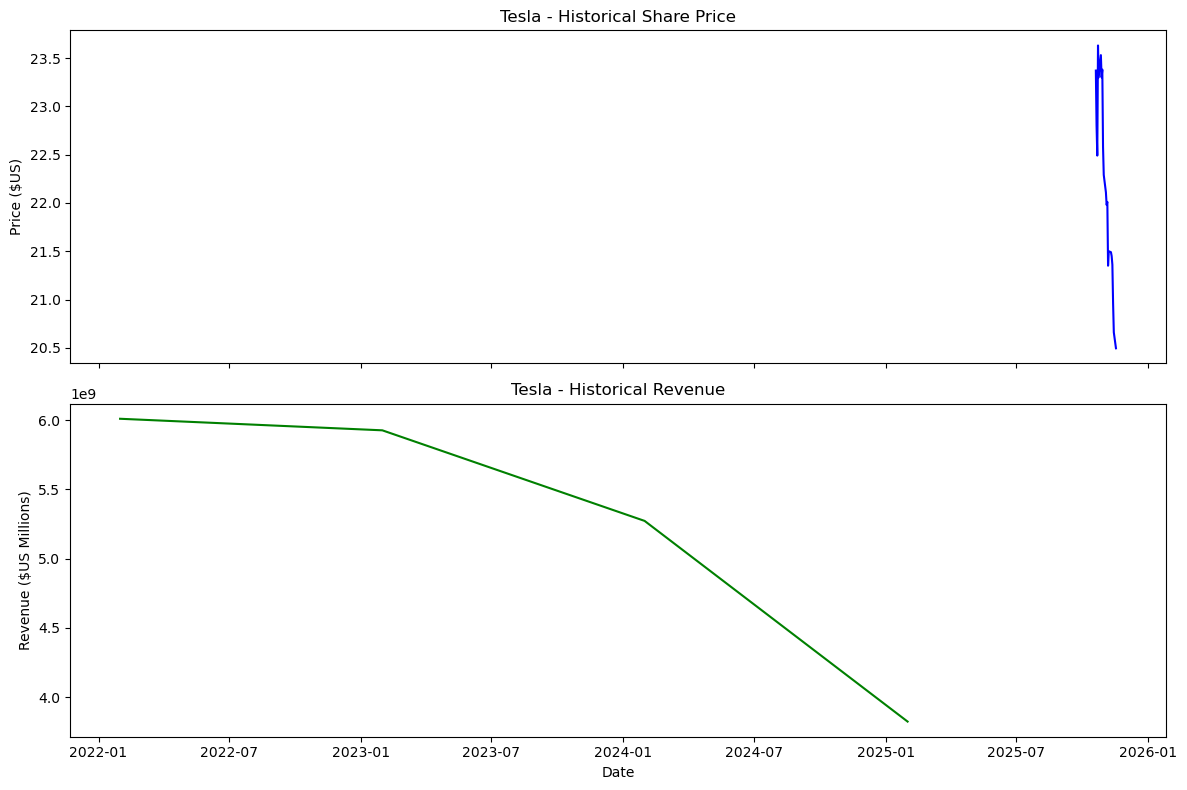

In [9]:
# Question 6

make_graph(game_data, gme_revenue, 'Tesla')